###Import Necessary Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

###Loading the Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

###Data Preprocessing

In [7]:
# Checking Duplicates
# 3.a Checking For Duplicates
print("Number of duplicates in train",sum(train.duplicated()))
print("Number of duplicates in test",sum(test.duplicated()))

Number of duplicates in train 0
Number of duplicates in test 0


In [9]:
# 3.b Checking For missing Values
print("Total number of missing values in train",sum(train.isna().sum()))
print("Total number of missing values in test",sum(test.isna().sum()))


Total number of missing values in train 0
Total number of missing values in test 0


###3.c Checking for class Imbalance

<Axes: xlabel='count', ylabel='Activity'>

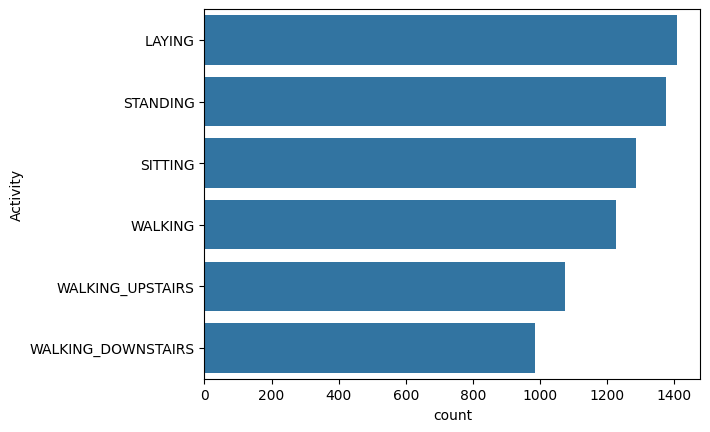

In [10]:
sns.countplot(train.Activity,order = train.Activity.value_counts().index)

* There is almost same number of observation across all the six activities so this data does not have class imbalance problem

In [11]:
#4.Exploratory Data Analysis
#what feature are there?
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [19]:
"angle(tBodyAccMean,gravity)".split('-')[0].split('(')[0]

'angle'

In [20]:
[col.split('-')[0].split('(')[0] for col in train.columns]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [22]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [26]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient = "index").rename(columns={0:'count'}).sort_values(by= 'count',ascending = False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


####4.a Analysing tBodyAccMag-mean Features

Text(0.2, 8, 'Dynamic Activity')

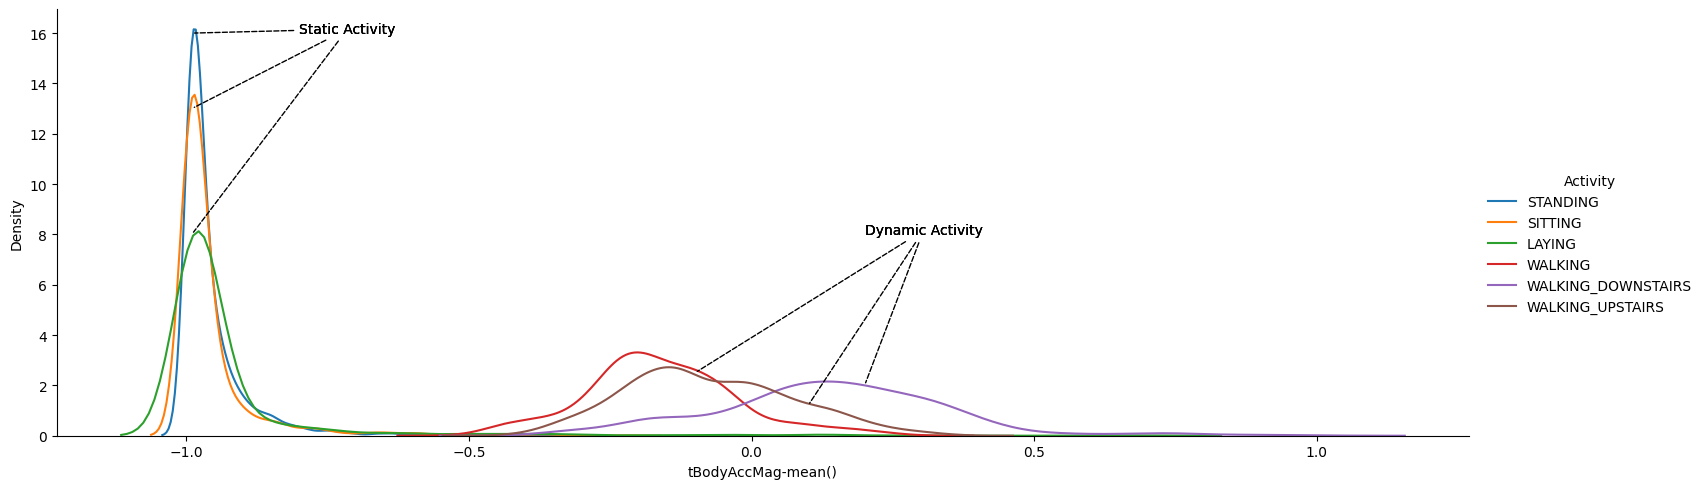

In [48]:
facetgrid = sns.FacetGrid(train,hue='Activity',height=5,aspect = 3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()',hist = False).add_legend()
# tBodyAccMag-mean this parameter is one of the important parameter in identifying static and dynamic attributes
plt.annotate("Static Activity",xy=(-.99,8),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activity",xy=(-.99,13),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Static Activity",xy=(-.99,16),xytext=(-.8,16),arrowprops={'arrowstyle':'-','ls':'dashed'})

plt.annotate("Dynamic Activity",xy=(0.2,2),xytext=(0.2,8),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activity",xy=(0.1,1.2),xytext=(0.2,8),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate("Dynamic Activity",xy=(-0.1,2.5),xytext=(0.2,8),arrowprops={'arrowstyle':'-','ls':'dashed'})

<Axes: title={'center': 'Dynamic activity (Closer view)'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

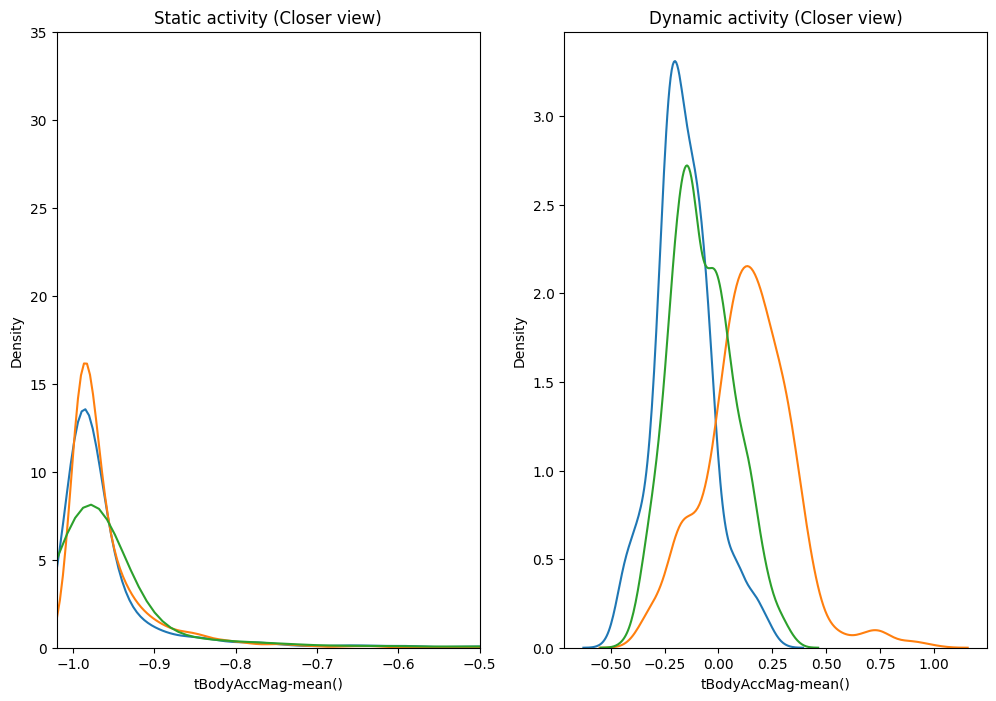

In [50]:
plt.figure(figsize =(12,8))
plt.subplot(1,2,1)
plt.title("Static activity (Closer view)")
sns.distplot(train[train["Activity"] == "SITTING"]['tBodyAccMag-mean()'],hist = False,label ="Sitting")
sns.distplot(train[train["Activity"] == "STANDING"]['tBodyAccMag-mean()'],hist = False,label = "Standing")
sns.distplot(train[train["Activity"] == "LAYING"]['tBodyAccMag-mean()'],hist = False,label='Laying')
plt.axis([-1.02,-0.5,0,35])
plt.subplot(1,2,2)
plt.title("Dynamic activity (Closer view)")
sns.distplot(train[train["Activity"] == "WALKING"]['tBodyAccMag-mean()'],hist = False,label ="WALKING")
sns.distplot(train[train["Activity"] == "WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = "WALKING_DOWNSTAIRS")
sns.distplot(train[train["Activity"] == "WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False,label='WALKING_UPSTAIRS')

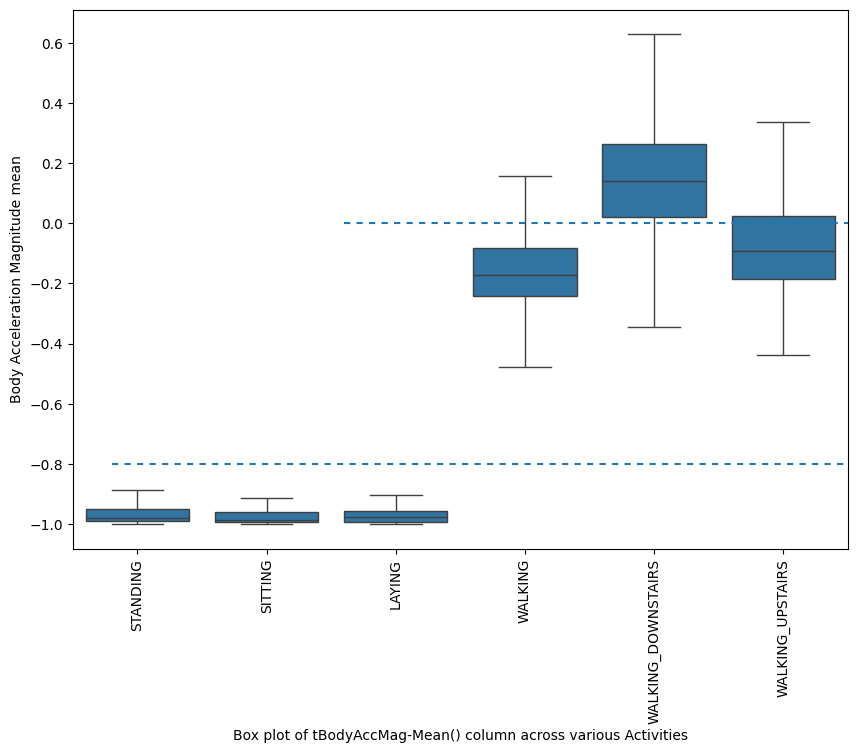

In [58]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Activity",y="tBodyAccMag-mean()",data = train,showfliers = False)
plt.ylabel("Body Acceleration Magnitude mean")
plt.xlabel("Box plot of tBodyAccMag-Mean() column across various Activities")
plt.xticks(rotation ='vertical')
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y = 0.0, xmin = 0.35, dashes = (3,3))
plt.show()

#Analysing Angle between X-axis and gravityMean feature

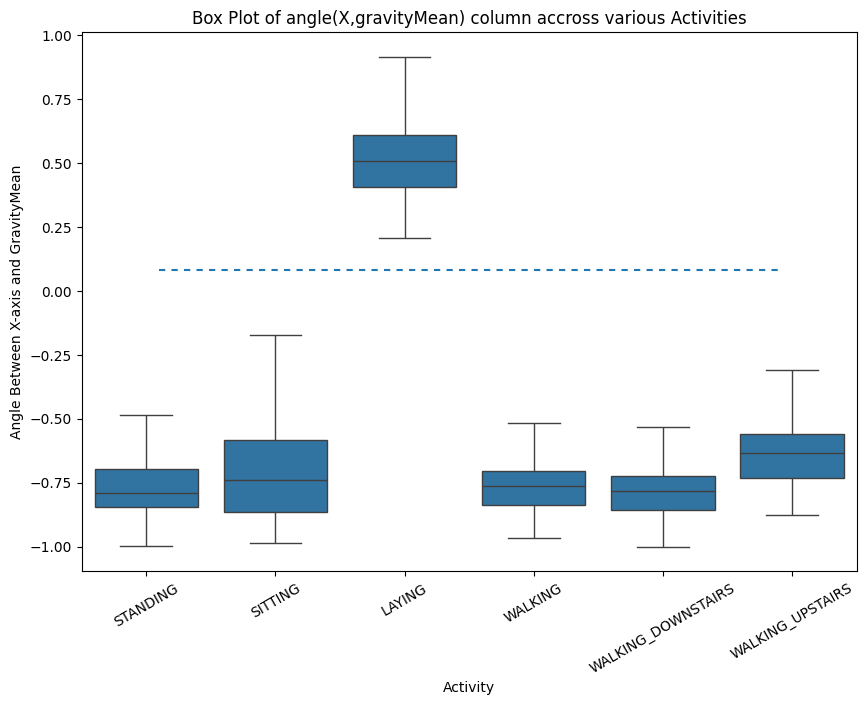

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(X,gravityMean)',data = train,showfliers = False)
plt.axhline(y = 0.08,xmin=0.1,xmax = 0.9,dashes =(3,3))
plt.ylabel("Angle Between X-axis and GravityMean")
plt.title("Box Plot of angle(X,gravityMean) column accross various Activities")
plt.xticks(rotation = 30)
plt.show()

In [61]:
#4.c Analysing Angle between Y-axis and Gravity Measures

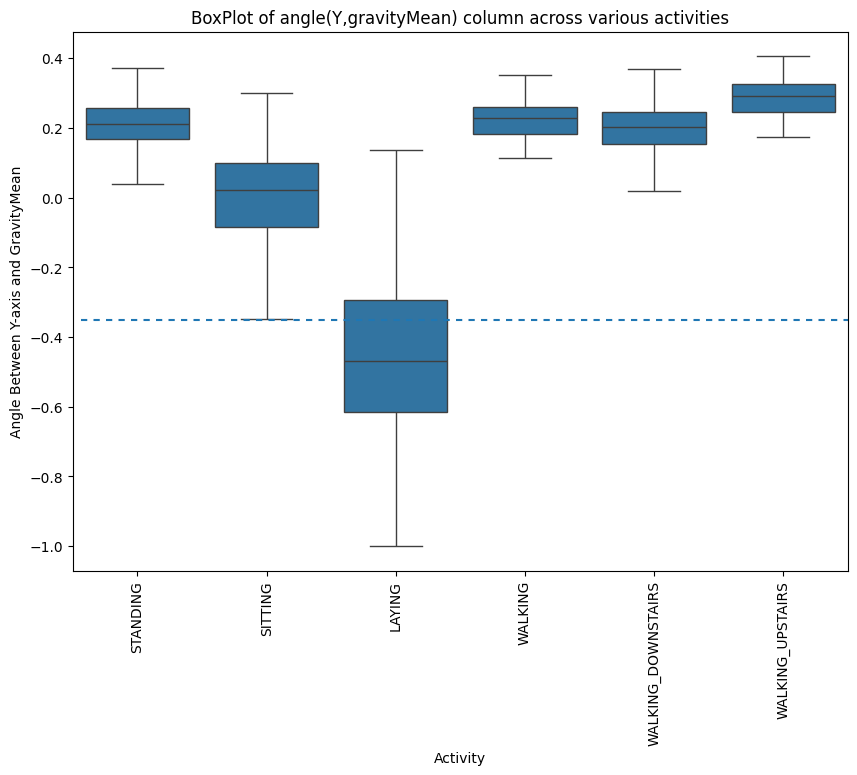

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y='angle(Y,gravityMean)',data = train,showfliers = False)
plt.ylabel("Angle Between Y-axis and GravityMean")
plt.title('BoxPlot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y = -0.35,xmin = 0.01,dashes=(3,3))
plt.show()

####Visualizing Data with PCA

####Using PCA data can be visualized from extremely high dimensional space to a low dimensional space and it still it retains lot of actual informaton

In [63]:
x_for_pca  = train.drop(['subject','Activity'],axis = 1)
pca = PCA(n_components = 2,random_state= 0).fit_transform(x_for_pca)
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

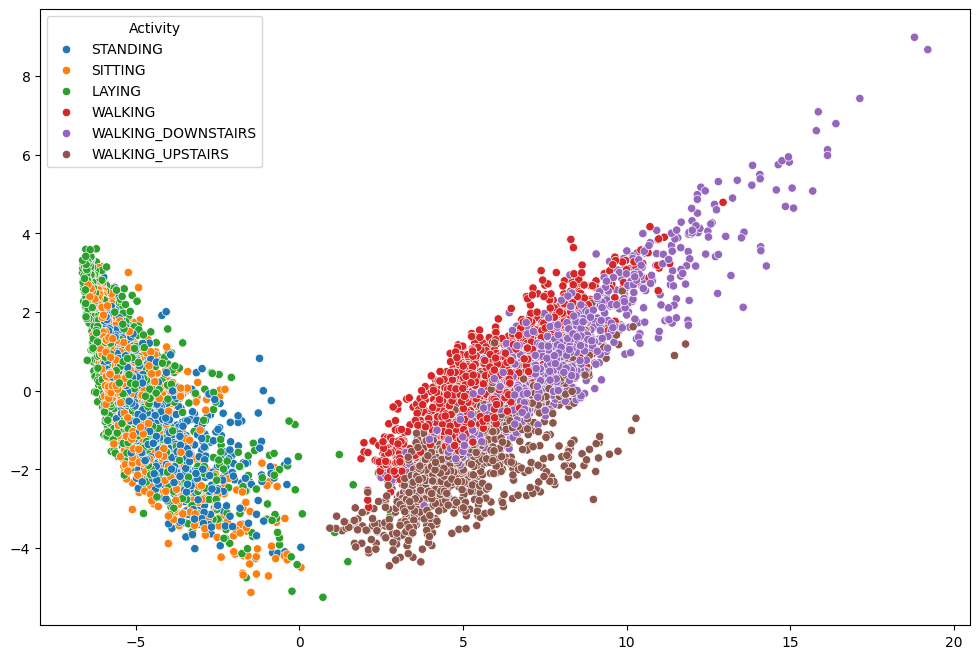

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = train['Activity'])
plt.show()

In [65]:
#4.d Visualizing data using t-sne
x_for_tsne = train.drop(['subject','Activity'],axis = 1)
tsne = TSNE(n_components=2,random_state =0,n_iter=1000).fit_transform(x_for_tsne)
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

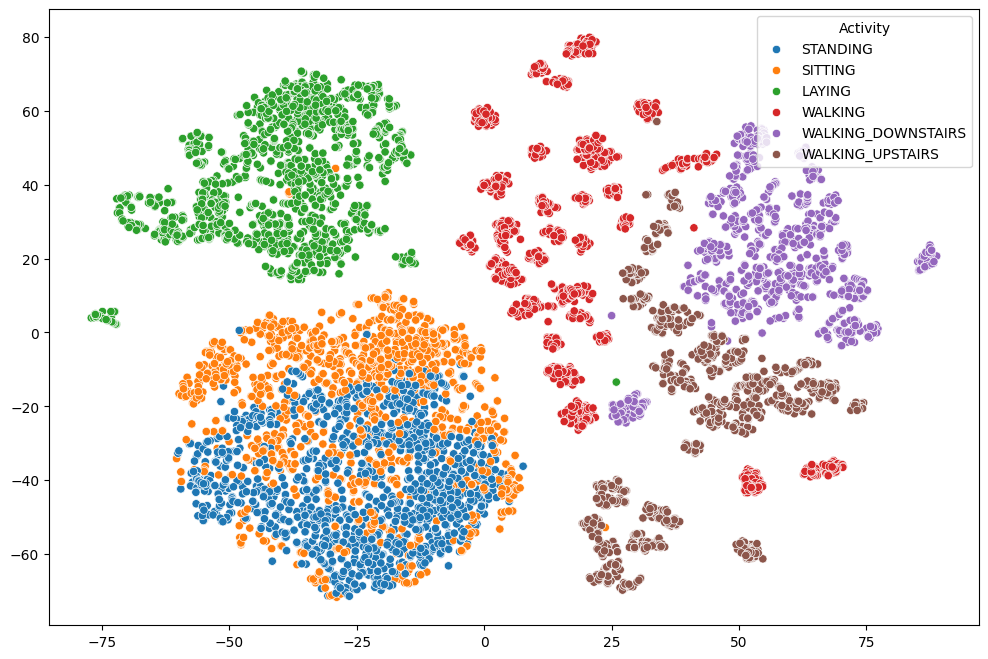

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue = train['Activity'])
plt.show()

###5.ML Models

In [67]:
#Getting training and test data ready
x_train = train.drop(['subject','Activity'],axis = 1)
y_train = train.Activity

x_test = test.drop(['subject','Activity'],axis = 1)
y_test = test.Activity

In [68]:
print("Training Data size : ",x_train.shape)
print("Test Data size : ",x_test.shape)

Training Data size :  (7352, 561)
Test Data size :  (999, 561)


###Logistic Regression model with Hyperparameter tuning and Cross Validation

In [74]:
parameters = {'max_iter':(100,200,500)}
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions = parameters,cv = 5)
lr_classifier_rs.fit(x_train,y_train)
y_pred = lr_classifier_rs.predict(x_test)

In [75]:
lr_accuracy = accuracy_score(y_true = y_test,y_pred = y_pred )
print("Accuracy using Logistic Regresion: ",lr_accuracy)

Accuracy using Logistic Regresion:  0.954954954954955


In [86]:
# Function to plot confusion Matrix
def plot_conf_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))  # for plotting confusion matrix in image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=labels, yticklabels=labels,
           ylabel='True Label',
           xlabel='Predicted label')
    plt.xticks(rotation=90)  # Corrected plt.ticks() to plt.xticks() and added 'rotation'
    thresh = cm.max() / 2
    for i in range(cm.shape[1]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [78]:
cm = confusion_matrix(y_test.values,y_pred)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]])

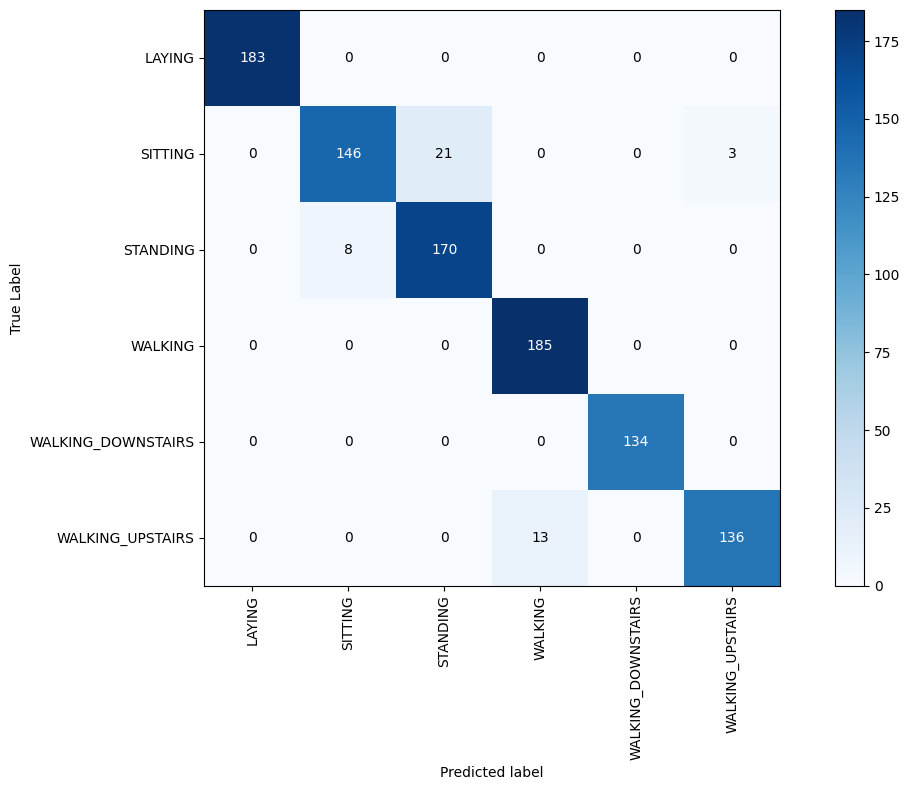

In [87]:
plot_conf_matrix(cm,np.unique(y_pred))

###5.c Kernel SVM model with Hyperparameter tuning and Cross validation

In [88]:
parameters = {
    'kernel':['linear','rbf','poly','sigmoid'] ,
    'C':[100,50]
}

svm_rs = RandomizedSearchCV(SVC(),param_distributions= parameters,cv =3,random_state=42)
svm_rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [89]:
y_pred= svm_rs.predict(x_test)
kernel_svm_accuracy = accuracy_score(y_true = y_test,y_pred=y_pred)
print("Accuracy using Kernel SVM : ",kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.965965965965966


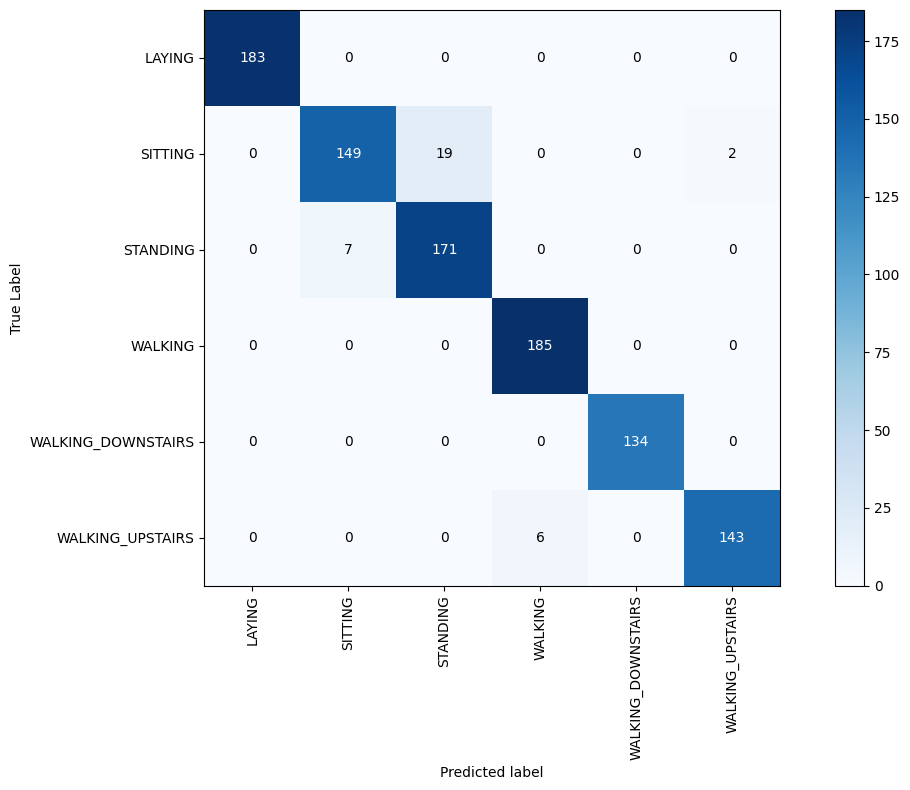

In [91]:
cm = confusion_matrix(y_test.values,y_pred)
plot_conf_matrix(cm,np.unique(y_pred))